IN THIS NOTEBOOK WE WILL LEARN ABOUT THE FUNCTION TRANSFORMER 
WE WILL IMPLEMENT 3 FUNCTION HERE IN THIS NOTEBOOK 
* LOG TRANSFORMER  ( APPLIED ON RIGHT SKEWED DATA )
* RECIPROCAL TRANSFORMER ( APPLIED ON LEFT SKEWED DATA )
* SQUARE AND SQAURE ROOT TRANSFORMER 

IMPORT THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np

In [42]:
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
import warnings
warnings.simplefilter("ignore")

In [4]:
df = pd.read_csv("titanic.csv", usecols =["Age", "Fare", "Survived"])

In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [28]:
df["Age"].fillna(df["Age"], inplace = True)

In [29]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [30]:
x = df.drop(["Survived"], axis = 1)
y= df["Survived"]

In [31]:
x

,Age,Fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2, random_state = 42)

## CHECKING THE DISTRIBUTION OF AGE COLUMN

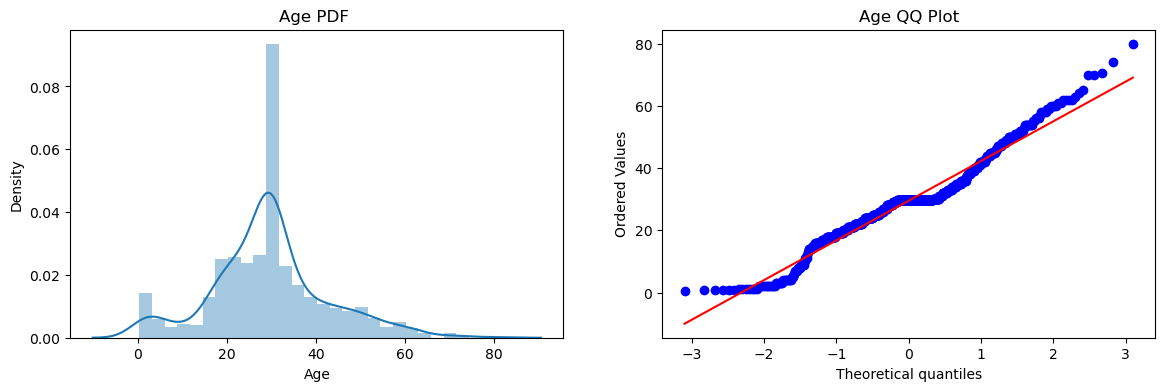

In [48]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train["Age"])
plt.title("Age PDF ")


plt.subplot(122)
stats.probplot(x_train["Age"], dist ="norm", plot=plt)
plt.title("Age QQ Plot")
plt.show()

## CHECKING THE DISTRIBUTION OF FARE COLUMN

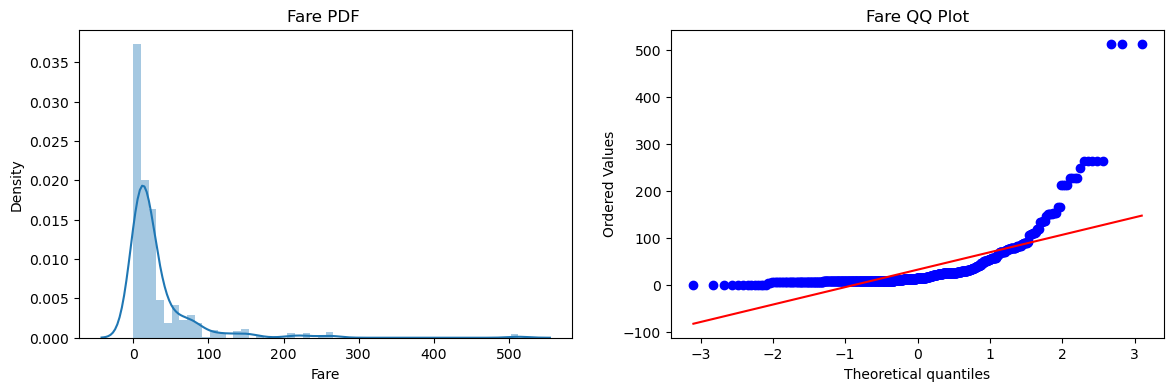

In [53]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train["Fare"])
plt.title("Fare PDF ")


plt.subplot(122)
stats.probplot(x_train["Fare"], dist ="norm", plot=plt)
plt.title("Fare QQ Plot")
plt.show()

In [55]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [64]:
clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)

y_pred = clf.predict(x_test)
y_pred1 = clf2.predict(x_test)

print("Accuracy LR", accuracy_score(y_test,y_pred))
print("Accuracy DT", accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6871508379888268


APPLYING FUNCTION TRANFORMATION 

In [66]:
trf = FunctionTransformer(func= np.log1p)


In [67]:
x_train_transform = trf.fit_transform(x_train)
x_test_transform = trf.transform(x_test)


In [69]:
clf.fit(x_train_transform,y_train)
clf2.fit(x_train_transform,y_train)

y_pred = clf.predict(x_test_transform)
y_pred1 = clf2.predict(x_test_transform)

print("Accuracy LR", accuracy_score(y_test,y_pred))
print("Accuracy DT", accuracy_score(y_test,y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6759776536312849
